# 3D $N^2$-Queens MCMC Solver

This notebook implements a Markov Chain Monte Carlo (MCMC) approach to solve the 3D $N^2$-Queens problem using:
- **Simulated Annealing**: Temperature controlled via exponential cooling schedule
- **Metropolis-Hastings Algorithm**: Probabilistic acceptance of proposed moves
- **Energy-based Search**: Minimizing queen conflicts in 3D space

The goal is to place $N²$ queens on an $N×N×N$ chessboard such that no two queens attack each other.

In [5]:
import matplotlib.pyplot as plt
from queens_game import QueensGame
from visualization import visualize_results

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Run MCMC Chain

Execute the MCMC solver with the configured parameters. The algorithm will:
1. Initialize N² queens randomly on an N×N×N board
2. Iteratively propose random queen moves
3. Accept/reject moves using Metropolis-Hastings criterion
4. Cool down via exponential annealing schedule
5. Track energy and acceptance rate throughout the run

### Comparing Beta Schedules

In this section, we compare the performance of the MCMC solver with different beta schedules namely:
- Exponential
- Linear
- Constant

Computing initial energy:   0%|          | 0/100 [00:00<?, ?it/s]

Minimizing energy:   0%|          | 0/100000 [00:00<?, ?it/s]

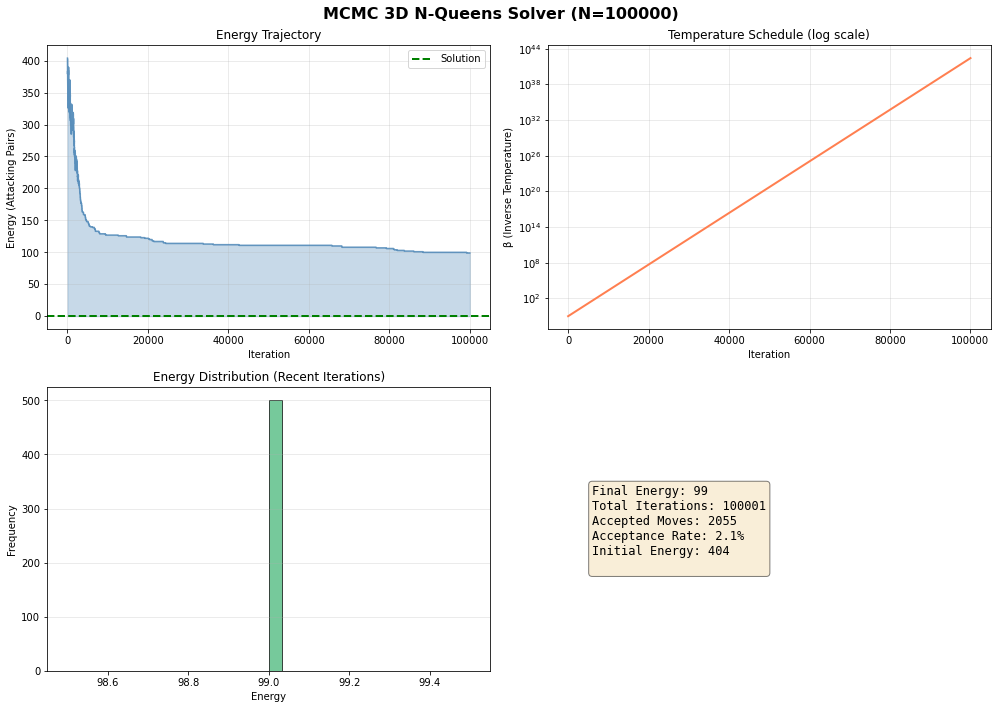

In [8]:
num_iterations = 100000
game = QueensGame(board_size=10)
result_1= game.minimize_energy(num_iterations=num_iterations, verbose=True, beta_func="exponential")
visualize_results(result_1, num_iterations)
plt.show()